# Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, you and your friend decide to break into the industry and open up your own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, you want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While you know your food will be delicious, you think there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, you decide to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project we'll be working with a real dataset provided by Yelp. Six files were provided, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

Project from https://www.codecademy.com/paths/data-science/tracks/dspath-supervised/modules/yelp-regression-project/informationals/predict-a-yelp-rating-regression


In [1]:
# Importing the required modules and loading datasets

In [2]:
import pandas as pd
businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

In [3]:
# Defining maximum number of columns and characters so data loads faster 
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500 

In [4]:
# Inspecting the first five rows of each dataset

In [5]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [6]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [7]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [8]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [9]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [10]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [11]:
# Checking how many different businesses there are in the dataset
# and the different features in the review DataFrame
print(len(businesses))
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


In [12]:
# Range of values for the features in the users DataFrame
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


In [13]:
# Identifying the stars rating of establishment '5EvUIR4IzCWUOm0PsUZXjA' 
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

In [14]:
# Merging all tables on business_id

In [15]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')
print(len(df))
# And verifying what new columns our df has
print(df.columns)


188593
Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


In [16]:
# Cleaning the data 

In [17]:
# Removing all columns that are not continuous or binary and that we do not want to make predictions on 
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)


In [18]:
# Verifying that our data does not have any missing value 
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [19]:
# Replacing missing values with 0 
df.fillna({'weekday_checkins': 0,
           'weekend_checkins': 0,
           'average_tip_length': 0,
           'number_tips': 0,
           'average_caption_length': 0,
           'number_pics': 0},
           inplace=True)

In [20]:
# Double checking now for any missing values
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

### Exploratory analysis
Now investigating what might correlate most with our dependent variable: Yelp rating (df['stars'])

In [21]:
# Reviewing the correlation coefficients for each features paired together.
# The closer to 1 the more correlation
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


In [22]:
# Plotting the 3 features that correlate the most against our dependent variable,
# stars rating. 
from matplotlib import pyplot as plt

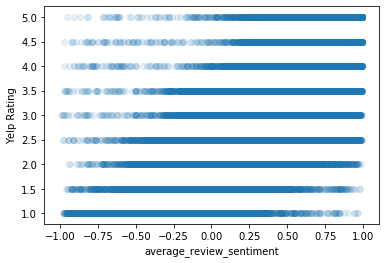

In [23]:
# Plotting average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

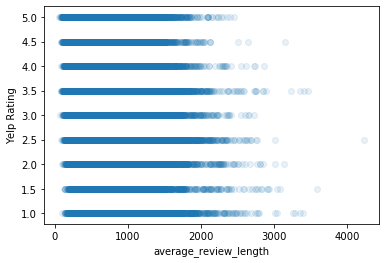

In [24]:
# Plotting average_review_length against stars here
plt.scatter(df['average_review_length'], df['stars'], alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()

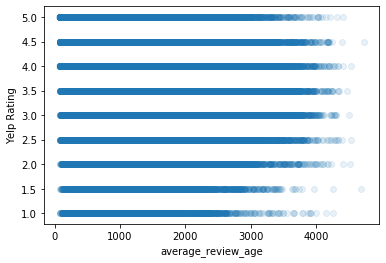

In [25]:
# Plotting average_review_age against stars here
plt.scatter(df['average_review_age'], df['stars'], alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

All three features have strong correlations against our dependent variable Stars rating. They will be good to use for our Yelp rating predicition model. 
The average review sentiment and ages are the features having the strongest correlations against Stars rating. <br>
Average review sentiment correlates so well because it is so close in its description to Stars rating, by identifying whether a review is positive or negative. 

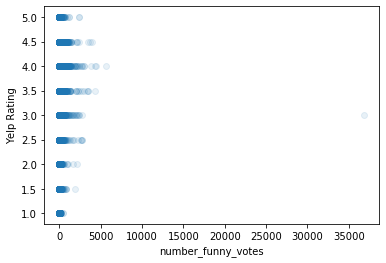

In [26]:
# Plotting a feature with very low correlation: number_funny_votes against stars here
plt.scatter(df['number_funny_votes'], df['stars'], alpha=0.1)
plt.xlabel('number_funny_votes')
plt.ylabel('Yelp Rating')
plt.show()

In [27]:
# Selecting data for Linear Regression Model
# Choosing average_review_length and average_review_age which have strong correlations but not \
# as strong as average_review_sentiment which is a direct translation or Stars rating

features = df[['average_review_length','average_review_age']]
ratings = df['stars']

In [28]:
# Importing the function from sklearn library
from sklearn.model_selection import train_test_split

# Splitting the data into Training and Testing Sets.
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)


In [29]:
# Importing LinearRegression module
from sklearn.linear_model import LinearRegression


# Creating model and training it
model = LinearRegression()
model.fit(features, ratings)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluating our model

In [30]:
# Evaluating model
model.score(X_train, y_train)

0.08249427581500002

In [31]:
model.score(X_test, y_test)

0.08091049023164465

In [32]:
# Looking at the coefficients on the different features. 
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)



[('average_review_length', -0.0009969359414608947),
 ('average_review_age', -0.0001158489363851371)]

The R^2 coefficient of determination for the length of review and age of the reviewer is rather low here, indicating our model does not fit perfectly the data. <br> This means these features alone are not able to effectively predict Yelp ratings and that more features will be needed to do so. 

In [33]:
# Calculating the predicted Yelp ratings for our testing data 
y_predicted = model.predict(X_test)

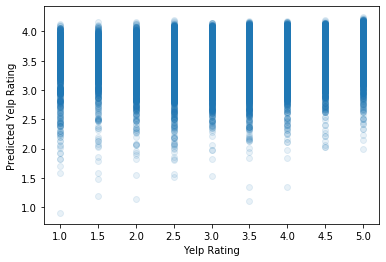

In [34]:
# Comparing our predicted Yelp ratings to our actual ones
plt.scatter(y_test, y_predicted, alpha=0.1)
plt.xlabel("Yelp Rating")
plt.ylabel("Predicted Yelp Rating")
plt.show()

Our model is homoscedastic although it does not reflect a perfect linear regression as the data does not plot exactly along the line y=x. 
This is due to the limited number of features used to build the model. 

### Further testing

In [35]:
# Testing if a more accurate model can be achieved with different subsets of data

In [36]:
# Subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [37]:
# Subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [38]:
# Subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [39]:
# Subset of all features
all_features = binary_features + numeric_features

In [40]:
# Subset of price range
feature_subset = ['price_range']

In [41]:
# Replicating the model building process into a function.  
import numpy as np

# taking a list of features to model as a parameter
def model_these_features(feature_list):
    
    # Creating two new DataFrames: 1-features, that contains the columns we want to model on, and 2-ratings, that store the values that we want to predict: Yelp star ratings
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # breaking data into a training set and a test set to evaluate how well
    # our model performs 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # allowing the model to work when modelling on just one feature instead of multiple ones.
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # created a new LinearRegression object named model 
    # then fitting our LinearRegression called model to our training data 
    # and calculated coefficients for our features.
    model = LinearRegression()
    model.fit(X_train,y_train)
    # our model has been trained on our training data!
    
    # Evaluating our model: getting the R square value for our model. It is the coefficient of determination: a measure 
    # that determines how much the variable we are researching (dependent variable) is explained by independent variables
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # printing the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculating predicted ratings for testing data to then compare them to our actual data
    y_predicted = model.predict(X_test)
    
    # Evaluating if this is a perfect linear regression: if it was the case, the data plotted along the line would be y = x 
    plt.scatter(y_test,y_predicted, alpha=0.1)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749612)]


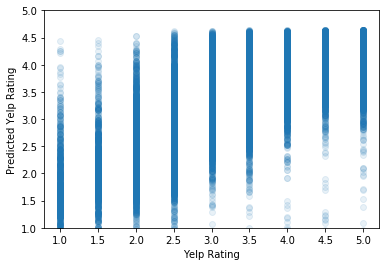

In [42]:
# Creating a model on sentiment here
model_these_features(sentiment)

As identified before, the sentiment model is homoscedastic ones as it takes whether a review is positive or negative. 

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208038988), ('alcohol?', -0.14549670708138188), ('has_wifi', -0.1318739757776259), ('good_for_kids', -0.08632485990337416), ('takes_credit_cards', 0.071755364921953), ('take_reservations', 0.04526558530451624)]


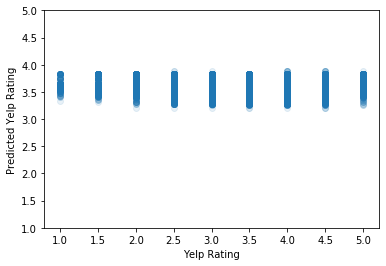

In [43]:
# Creating a model on all binary features here
model_these_features(binary_features)

Binary features is highly heteroscedasctic. Whether a restaurant has wifi, bike parking or takes credit cards is not enough to predict its Stars ratings

Train Score: 0.6734992593766658
Test Score: 0.6713318798120151
[('average_review_sentiment', 2.2721076642095714), ('price_range', -0.08046080962701326), ('average_number_years_elite', -0.07190366288054215), ('average_caption_length', -0.00334706600778448), ('number_pics', -0.0029565028128954863), ('number_tips', -0.0015953050789045838), ('number_cool_votes', 0.0011468839227079775), ('average_number_fans', 0.0010510602097412254), ('average_review_length', -0.0005813655692093357), ('average_tip_length', -0.0005322032063459733), ('number_useful_votes', -0.0002320378475871201), ('average_review_count', -0.0002243170289501482), ('average_review_age', -0.00016930608165055923), ('average_days_on_yelp', 0.00012878025876674438), ('weekday_checkins', 5.91858075448613e-05), ('weekend_checkins', -5.518176206999151e-05), ('average_number_friends', 4.8269921116315975e-05), ('review_count', -3.483483763748981e-05), ('number_funny_votes', -7.884395673808679e-06)]


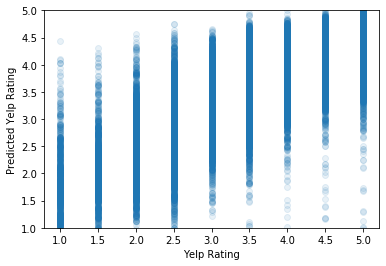

In [44]:
# Creating a model on all numeric features here
model_these_features(numeric_features)

On the other hand, numeric features are highly important to predict a restaurant's star ratings. 

Train Score: 0.6807828861895334
Test Score: 0.6782129045869247
[('average_review_sentiment', 2.2808456996623825), ('alcohol?', -0.14991498593470284), ('has_wifi', -0.12155382629261363), ('good_for_kids', -0.1180781442201382), ('price_range', -0.06486730150043177), ('average_number_years_elite', -0.06278939713895364), ('has_bike_parking', 0.027296969912292805), ('takes_credit_cards', 0.024451837853653652), ('take_reservations', 0.014134559172969846), ('number_pics', -0.0013133612300796843), ('average_number_fans', 0.0010267986822656814), ('number_cool_votes', 0.0009723722734409323), ('number_tips', -0.0008546563320873921), ('average_caption_length', -0.0006472749798195219), ('average_review_length', -0.0005896257920272453), ('average_tip_length', -0.00042052175034042557), ('number_useful_votes', -0.00027150641256153645), ('average_review_count', -0.000233983569025111), ('average_review_age', -0.00015776544111324774), ('average_days_on_yelp', 0.0001232614766288456), ('review_count', 0.00

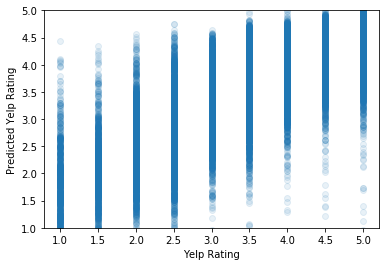

In [45]:
# Creating a model on all features here
model_these_features(all_features)

Taking all features overall would be a great way to accurately predict a restaurant's Stars ratings as the model here using all features is close to being homoscedastic

Train Score: 0.00273518518581628
Test Score: 0.0026676219581159843
[('price_range', -0.051205196068917096)]


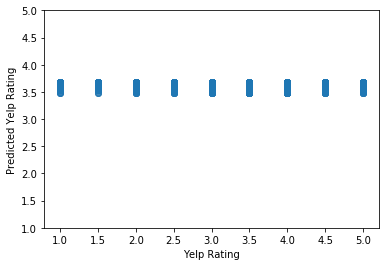

In [46]:
# Creating a model on pricing feature subset here
model_these_features(feature_subset)

The pricing range alone produces a highly heteroscedastic model though.

## Danielle's Delicious Delicacies' Debut

Now trying to predict what our new restaurant's Yelp ratings will be using our model. 
The best model was the one using all features - we will use this one. 


In [47]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


Run the cell below to grab all the features and retrain our model on them.

In [48]:
# Taking all features and retraining our model on them 

features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Restaurants' features' mean, min and max to determine Danielle's Delicious Delicacies' features
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


In [50]:
# Danielle's Delicious Delicacies' features
danielles_delicious_delicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [51]:
model.predict(danielles_delicious_delicacies)

array([4.03799004])

Using the above features, Danielle's Delicious Delicacies' star rating will be 4.04.